# Machine Learning with scikit-learn

> [scikit-learn](http://scikit-learn.org/) or *sklearn* is a Machine Learning library in Python. It is fully interoperable with *numpy* and *scipy*.

Scikit-learn is the largest and best supported ML library in python. Its structure resembles how *scipy* is organized, i.e. in subpackages, the main of which are:

- `sklearn.datasets`: Contains functions for downloading and loading several known datasets, as well as tools for creating artificial ones.
- `sklearn`.**model_family**: All models (supervised and unsupervised) are grouped into categories or families. For example: 
    - `sklearn.dummy`: *Dummy* classifiers and regressors used for benchmarking (e.g. `DummyClassifier`, `DummyRegressor`) .
    - `sklearn.linear_model`: Family of linear models (e.g. `LinearRegression`, `LogisticRegression`, `Lasso`, `Ridge`).
    - `sklearn.tree`: Tree-based algorithms (e.g. `DecisionTreeClassifier`, `DecisionTreeRegressor`).
    - `sklearn.ensemble`: Ensemble methods (e.g. `RandomForestClassifier`, `GradientBoostingClassifier`).
    - `sklearn.naive_bayes`: Naive Bayes algorithms (e.g. `GaussianNB`).
    - `sklearn.neighbors`: k-Nearest Neighbors implementations (e.g. `KNeighborsClassifier`, `KNeighborsRegressor`).
    - `sklearn.neural_network`: Neural Network based algorithms (e.g. `MLPClassifier`, `MLPRegressor`).
    - `sklearn.cluster`: Collection of clustering algorithms (e.g. `KMeans`, `DBSCAN`, `SpectralClustering`).
- `sklearn.preprocessing`: Sub-module including multiple preprocessing options (e.g. *scaling*, *normalization*).
- `sklearn.impute`: Classes that handle imputing missing values. 
- `sklearn.feature_selection`: Techniques for selecting or discarding features based on certain criteria.
- `sklearn.feature_extraction`: Feature extraction algorithms.
- `sklearn.metrics`: Implementations of a large number of performance metrics both for supervised and unsupervised learning.
- `sklearn.model_selection`: Contains functions for splitting the data and evaluating models. 
- `sklearn.pipeline`: The *Pipeline* class which incorporates multiple steps of the ML workflow into a single object. 
- `sklearn.utils`: Includes various utilities.

Through this tutorial we will get acquainted with the main functionality of scikit-learn. To do this, we'll load one of scikit-learn's datasets (which are already processed to a great extent), split it into a training and test set, train ML models on them and compare them to see which one performed the best.

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Datasets

The first thing we'll do is to load a dataset. Scikit-learn has a submodule called `datasets` which contains many popular datasets we can use. For this tutorial we'll work with the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

This dataset depicts a **classification** problem with $150$ samples, each having $4$ features (i.e. sepal length, sepal width, petal length and petal width). Each sample belongs to one of 3 classes (i.e. *Iris Versicolor*, *Iris Setosa* and *Iris Virginica*).

In [2]:
from sklearn import datasets
iris = datasets.load_iris()  # downloads and loads the dataset into memory in the form of a dictionary
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Each scikit-learn dataset (including `iris`) contains 5 things:
- `data` a numpy array containing of the dataset's training examples.
- `feature_names` is a list containing the names of each feature.
- `target` is an array containing the labels (or targets) for all the examples.
- `target_names` is an array containing the names of the three target classes.
- `DESCR` is a string containing the description of the dataset.

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print('Features:', iris['data'].shape)
print('Labels:', iris['target'].shape)
print('Classes:', iris['target_names'])

Features: (150, 4)
Labels: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


More information on the datasets scikit-learn provides can he found [here](http://scikit-learn.org/stable/datasets/index.html#datasets).

## train/test split

The first thing we want to do is to **shuffle** the dataset along its rows and **split** it into two parts. The first will be used to train the classifier; we'll call this the **training set**. The second will be used to evaluate the classifier's performance on and will be referred to as the **test set**. 

It is crucial **not** to evaluate the classifier's performance on the training set, as they usually suffer from a problem called *overfitting*, which we will investigate later on. It is also important to first shuffle the data before splitting it, so that the test set's distribution matches the training set's.

The whole procedure is depicted in the following figures. First, we shuffle and split the data (the percentages are arbitrary):

![train test split](https://i.imgur.com/ZDjKu8l.png)

Then we use the training set to train the model:

![training phase](https://i.imgur.com/cHlSuBC.png)

Finally, we evaluate the model's performance on the test set:

![evaluation](https://i.imgur.com/RrrDeh3.png)

Scikit-learn has a function to help us with the splitting:

In [5]:
from sklearn.model_selection import train_test_split

seed = 13  # random seed for reproducibility

# This function handles both shuffling and splitting
train, test, train_labels, test_labels = train_test_split(iris['data'], iris['target'], test_size=0.4, random_state=seed)
print('Full data size:')
print(iris['data'].shape, iris['target'].shape)
print('\nTraining data size:')
print(train.shape, train_labels.shape)
print('\nTest data size:')
print(test.shape, test_labels.shape)

Full data size:
(150, 4) (150,)

Training data size:
(90, 4) (90,)

Test data size:
(60, 4) (60,)


So, we just shuffled and split our 150 samples into a training set (90 samples) and a test set (60 samples). Note that the labels were shuffle-split **accordingly**.

## Training classifiers

It's time to create a classifier. The first one we will use is [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). In scikit-learn all models are instances of a class called an *estimator*. This helps us a lot because most estimators share the same methods.

The usual way of handling estimators in python is:

```python
from sklearn.model_family import model  # model_family is the family of classifiers that model belongs to

my_model = model(...)  # as arguments we pass the values of any hyperparameters we wish to control

my_model.fit(X_train, y_train)  # X_train: training data, y_train: training labels
                                # this line handles the complete training phase

preds = my_model.predict(X_test)  #  to generate predictions on the test set
```

In [6]:
from sklearn.linear_model import LogisticRegression  # LogisticRegression belongs to the family of linear_models

clf = LogisticRegression()  # we will use the default hyperparameter settings

clf.fit(train, train_labels)  # train the model. this might take a minute...

c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Model evaluation

OK, we've trained the model. Now we have to see how well it performs. In order to do this we must first define a **metric** (i.e. a function that evaluates the performance of our model). The simplest metric we can use in classification is **accuracy** (i.e. the number of correct predictions, over the number of total predictions). A full guide on scikit-learn metrics can be found [here](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation).

Most metrics are scikit-learn functions that accept two arguments: `y_test` (the test set labels) and `y_pred` (the model's predictions on the test set).

```python
from sklearn.metrics import desired_metric  # import the desired metric

y_pred = my_model.predict(X_test)  # generate predictions

print(desired_metric(y_test, y_pred))  # print the model's score 
```

In [7]:
from sklearn.metrics import accuracy_score

preds = clf.predict(test)

print(accuracy_score(test_labels, preds))

0.95


So we scored 95% on the test set. While that might appear a good enough result, let's see if we can do better with other ML algorithms. Because of the way scikit-learn organizes its *estimators*, we need to know which family each *estimator* belongs to import it.

Another important observation is that we can interact with each model the same way, **regardless** of how it works.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# We will use the default arguments for all classifiers
mlp = MLPClassifier()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()

# Train the four classifiers
mlp.fit(train, train_labels)
knn.fit(train, train_labels)
dtc.fit(train, train_labels)
svc.fit(train, train_labels)

# Evaluate the classifiers
preds = mlp.predict(test)
print('mlp:', accuracy_score(test_labels, preds))
preds = knn.predict(test)
print('knn:', accuracy_score(test_labels, preds))
preds = dtc.predict(test)
print('dtc:', accuracy_score(test_labels, preds))
preds = svc.predict(test)
print('svc:', accuracy_score(test_labels, preds))

mlp: 0.9833333333333333
knn: 0.95
dtc: 0.9333333333333333
svc: 0.9833333333333333


c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Hyperparameters

Complex classifiers usually have several **hyperparameters**; parameters that affect the behaviour of the classifier, which we must select in order to achieve the best results. The classifiers we trained above were initialized with default values for their hyperparameters, so their performance was probably **unoptimized**. The selection of hyperparameters can either be **empirical** or through **trial and error**.

We'll start by trying to optimize the kNN classifier by choosing the best value of $k$. The most intuitive way of doing so is through a for loop.

Best accuracy 96.67% for k=1


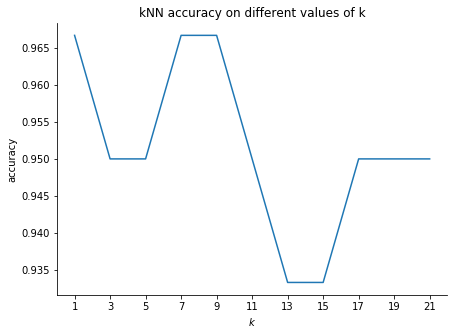

In [9]:
knn_accuracies = []
for k in range(1, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train, train_labels)
    knn_accuracies.append(accuracy_score(test_labels, knn.predict(test)))

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Draw figure
ax.plot(range(1, 22, 2), knn_accuracies)

# Aesthetic parameters
ax.set_xticks(range(1, 22, 2))

ax.set_xlabel('$k$')
ax.set_ylabel('accuracy')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('kNN accuracy on different values of k')

print('Best accuracy {:.2f}% for k={}'.format(max(knn_accuracies)*100, list(range(1, 22, 2))[np.argmax(knn_accuracies)]))

The procedure above is called **hyperparameter tuning** and can usually improve the performance of the classifier. This is even more important for more complex classifiers with multiple hyper-parameters. For example [Multi-Layer Perceptrons](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) have a plethora of hyper-parameters which we might want to tune. We'll try to select the best *hidden layer size* and *activation*.

In [10]:
import warnings
warnings.filterwarnings('ignore')

accuracies = []

for hidden in [(10,), (20,), (50,), (100,), (200,)]:  # consider hidden layer sizes of 10, 20, 50, 100 and 200
    for activation in ['logistic', 'relu', 'tanh']:  # consider 'logistic' (sigmoid), 'relu' and 'tanh' activation functions
        mlp = MLPClassifier(hidden_layer_sizes=hidden, activation=activation)
        mlp.fit(train, train_labels)
        accuracies.append(accuracy_score(test_labels, mlp.predict(test)))

print('Best accuracy: {:.2f}%'.format(max(accuracies)*100))

Best accuracy: 96.67%


Optimizing ML models through *for* loops isn't the most efficient way. The best parameters are hard to identify, the computer makes no use of parallelization and the code isn't as *elegant* as possible. 

## Grid search

Scikit-learn offers an easier, scalable and more elegant way of performing hyperparameter optimization, called [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). This function takes two main arguments: an estimator (or pipeline) and a *grid* of parameters we want the grid search to consider. The grid could be one of two things:

- A dictionary with the hyperparameter names as its keys and a list of values as the corresponding dictionary value:
```python
grid = {'name1': [val_1a, val_1b, val_1c], 'name2': [val_2a, val_2b]}
```
This will force the grid search to search for **all** possible combinations of parameter values. In this case:  
```python
(val_1a, val_1a), (val_1a, val_2b), (val_1b, val_2a), (val_1b, val_2b), (val_1c, val_2a), (val_1c, val_2b)
```

- A list of such dictionaries:
```python
grid = [{'name1': [val1, val2, val3], 'name2': [val4, val5], ...},
        {'name1': [val1, val2, val3], 'name3': [val6, val7], ...}]
```
This will create a grid that contains combinations from both dictionaries.

After creating such a grid:

```python
from sklearn.model_selection import GridSearchCV

grid = {...}
clf = GridSearchCV(estimator, grid)
clf.fit(X_train, y_train)  # will search all possible combinations defined by the grid
preds = clf.predict(X_test)  # will generate predictions based on the best configuration

# In order to access the best model:
clf.best_estimator_
```

We will reproduce the previous hyperparameter tuning we performed, through a grid search.

In [11]:
from sklearn.model_selection import GridSearchCV

# configurations we searched previously
grid = {'hidden_layer_sizes': [(10,), (20,), (50,), (100,), (200,)],
        'activation': ['logistic', 'relu', 'tanh']}
# the keys of the dictionary should have the same names as the arguments of the estimator

clf = GridSearchCV(mlp, grid, cv=2) # the cv parameter will be explained in the next tutorial
clf.fit(train, train_labels)
print('Best accuracy: {:.2f}%'.format(accuracy_score(test_labels, clf.predict(test))*100))
print(clf.best_estimator_)  # print the best configuration

Best accuracy: 98.33%
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
